# Scratch Work - Notebook
This notebook is write and test out PySpark Code more easily

In [1]:
import pandas as pd

In [2]:
income = pd.read_csv("income_cleaned.csv")
income.head()

,00000,AK,1,102970.0000,1217577.0000,91.0000,2345.0000,760.0000,2871.0000,258661.0000\t1
0,0,AK,2,78020.0,2883175.0,99.0,7750.0,2140.0,8440.0,1606418.0000\t1
1,0,AK,3,51120.0,3184731.0,488.0,14187.0,3470.0,15114.0,2212441.0000\t1
2,0,AK,4,35550.0,3112057.0,474.0,15475.0,3520.0,16971.0,2334158.0000\t1
3,0,AK,5,59750.0,8274715.0,3487.0,46867.0,8750.0,51648.0,6713257.0000\t1
4,0,AK,6,17810.0,6953958.0,6337.0,56867.0,6340.0,51250.0,6090219.0000\t1


In [3]:
income.tail()

,00000,AK,1,102970.0000,1217577.0000,91.0000,2345.0000,760.0000,2871.0000,258661.0000\t1
165623,99901,AK,2,1490.0,54854.0,0.0,159.0,50.0,197.0,30765.0000\t1
165624,99901,AK,3,960.0,60040.0,0.0,158.0,50.0,200.0,41785.0000\t1
165625,99901,AK,4,670.0,58941.0,0.0,160.0,60.0,219.0,43461.0000\t1
165626,99901,AK,5,1000.0,135844.0,369.0,463.0,110.0,619.0,109344.0000\t1
165627,99901,AK,6,280.0,111750.0,0.0,540.0,90.0,650.0,95546.0000\t1


In [4]:
real = pd.read_csv("real_cleaned.csv")
real.head()

,201801,10001,4950000,79,2054.737468,2053,6114301.803,187\t1
0,201801,10002,1922500.0,114,1917.428043,1027.5,2344101.514,1250\t1
1,201801,10003,2072500.0,170,1384.542096,670.0,3716218.722,590\t1
2,201801,10004,1185000.0,22,1285.714286,852.5,2322130.435,42\t1
3,201801,10005,1395000.5,79,1385.177251,963.0,1624165.762,139\t1
4,201801,10006,2444000.0,56,2271.037265,986.5,4200294.772,244\t1


## Experiment with PySpark

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [6]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

In [7]:
# random spark dataframe test
df = spark.createDataFrame([
    Row(a=1, b=2., c='string1', d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3., c='string2', d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5., c='string3', d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])

In [8]:
df.show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  4|5.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



In [9]:
real = spark.read.csv("real_cleaned.csv")

In [10]:
# rename real columns
actual_columns = ["date", "zipcode", "median_listing_price", "active_listing_count",
                  "median_per_sq_ft", "median_sq_ft", "average_listing_price",
                  "total_listing_count"]

for i in range(len(actual_columns)):
    real = real.withColumnRenamed("_c" + str(i), actual_columns[i])

In [11]:
real.show(5)

+------+-------+--------------------+--------------------+----------------+------------+---------------------+-------------------+
|  date|zipcode|median_listing_price|active_listing_count|median_per_sq_ft|median_sq_ft|average_listing_price|total_listing_count|
+------+-------+--------------------+--------------------+----------------+------------+---------------------+-------------------+
|201801|  10001|             4950000|                  79|     2054.737468|        2053|          6114301.803|              187	1|
|201801|  10002|             1922500|                 114|     1917.428043|      1027.5|          2344101.514|             1250	1|
|201801|  10003|             2072500|                 170|     1384.542096|         670|          3716218.722|              590	1|
|201801|  10004|             1185000|                  22|     1285.714286|       852.5|          2322130.435|               42	1|
|201801|  10005|           1395000.5|                  79|     1385.177251|        

In [12]:
income = spark.read.csv("income_cleaned.csv")

In [13]:
income_columns = ["zipcode", "state", "agi_stub", "n1", "total_income", "state_and_local",
                 "real_estate", "num_paid", "paid_amount", "taxable_amount"]
for i in range(len(income_columns)):
    income = income.withColumnRenamed("_c" + str(i), income_columns[i])

In [14]:
income.show(5)

+-------+-----+--------+-----------+------------+---------------+-----------+---------+-----------+--------------+
|zipcode|state|agi_stub|         n1|total_income|state_and_local|real_estate| num_paid|paid_amount|taxable_amount|
+-------+-----+--------+-----------+------------+---------------+-----------+---------+-----------+--------------+
|  00000|   AK|       1|102970.0000|1217577.0000|        91.0000|  2345.0000| 760.0000|  2871.0000| 258661.0000	1|
|  00000|   AK|       2| 78020.0000|2883175.0000|        99.0000|  7750.0000|2140.0000|  8440.0000|1606418.0000	1|
|  00000|   AK|       3| 51120.0000|3184731.0000|       488.0000| 14187.0000|3470.0000| 15114.0000|2212441.0000	1|
|  00000|   AK|       4| 35550.0000|3112057.0000|       474.0000| 15475.0000|3520.0000| 16971.0000|2334158.0000	1|
|  00000|   AK|       5| 59750.0000|8274715.0000|      3487.0000| 46867.0000|8750.0000| 51648.0000|6713257.0000	1|
+-------+-----+--------+-----------+------------+---------------+-----------+---

In [15]:
# enable the tables to be used by SQL
real.createOrReplaceTempView("real_estate_clean")
income.createOrReplaceTempView("income_clean")

In [16]:
# example dataframe
df = spark.sql("SELECT * from income_clean")
df.show(2)

+-------+-----+--------+-----------+------------+---------------+-----------+---------+-----------+--------------+
|zipcode|state|agi_stub|         n1|total_income|state_and_local|real_estate| num_paid|paid_amount|taxable_amount|
+-------+-----+--------+-----------+------------+---------------+-----------+---------+-----------+--------------+
|  00000|   AK|       1|102970.0000|1217577.0000|        91.0000|  2345.0000| 760.0000|  2871.0000| 258661.0000	1|
|  00000|   AK|       2| 78020.0000|2883175.0000|        99.0000|  7750.0000|2140.0000|  8440.0000|1606418.0000	1|
+-------+-----+--------+-----------+------------+---------------+-----------+---------+-----------+--------------+
only showing top 2 rows



In [17]:
## We need to get a new table by aggregating the two tables and then joining them

query1 = """

WITH income AS (
	
	SELECT zipcode, state, sum(total_income*1000)/sum(n1) as avg_income from income_clean GROUP BY zipcode, state
),

real_estate AS (

	SELECT zipcode, avg(median_listing_price) as avg_median_listing_price from real_estate_clean GROUP BY zipcode
)

SELECT income.zipcode, income.state, income.avg_income, real_estate.avg_median_listing_price, 
income.avg_income - real_estate.avg_median_listing_price as diff from income JOIN real_estate ON 
income.zipcode = real_estate.zipcode ORDER BY diff


"""

query1 = query1.replace("\n", " ").replace("\t", " ")

In [18]:
# this query joins the two datasets, aggregates them by zipcode, and selects only the relevant columns
query2 = """
WITH income AS (
	
	SELECT zipcode, state, (sum(total_income)-sum(state_and_local))*1000/sum(n1) as post_tax_income from income_clean GROUP BY zipcode, state
),

real_estate AS (

	SELECT zipcode, avg(median_listing_price) as avg_median_listing_price from real_estate_clean GROUP BY zipcode
)

SELECT income.zipcode, income.state, income.post_tax_income, real_estate.avg_median_listing_price, income.post_tax_income - real_estate.avg_median_listing_price as diff from income JOIN real_estate ON income.zipcode = real_estate.zipcode ORDER BY diff



"""

query2 = query2.replace("\n", " ").replace("\t", " ")

In [19]:
df = spark.sql(query2)
df.show()

+-------+-----+------------------+------------------------+-------------------+
|zipcode|state|   post_tax_income|avg_median_listing_price|               diff|
+-------+-----+------------------+------------------------+-------------------+
|  94027|   CA|1581435.9133126936|    1.0912958333333334E7|  -9331522.42002064|
|  94022|   CA| 690373.1343283582|       6399907.333333333| -5709534.199004975|
|  90210|   CA| 714445.1022604952|               6354500.0| -5640054.897739504|
|  90077|   CA| 684034.0852130326|       5660416.666666667| -4976382.581453634|
|  10013|   NY|  484218.400520156|       4737333.333333333| -4253114.932813177|
|  89413|   NV| 657810.5263157894|               4803750.0|-4145939.4736842103|
|  94010|   CA| 385694.8119942884|       4244791.666666667|-3859096.8546723784|
|  94028|   CA| 736867.8362573099|       4544611.111111111|-3807743.2748538014|
|  10007|   NY| 715089.0957446808|               4473000.0|-3757910.9042553194|
|  90265|   CA|278210.74249605055|      

In [20]:
df

DataFrame[zipcode: string, state: string, post_tax_income: double, avg_median_listing_price: double, diff: double]

In [21]:
df.describe().show()

+-------+------------------+-----+------------------+------------------------+-------------------+
|summary|           zipcode|state|   post_tax_income|avg_median_listing_price|               diff|
+-------+------------------+-----+------------------+------------------------+-------------------+
|  count|             15891|15891|             15891|                   15891|              15891|
|   mean| 52199.64741048392| null| 73160.09935464531|       323458.3579923549|-250298.25863770972|
| stddev|26283.550113090765| null| 63984.77317612184|      339307.91408397135| 299720.14731215296|
|    min|             10001|   AK| 21754.24836601307|      13608.333333333334|  -9331522.42002064|
|    max|             99901|   WY|3848388.4615384615|    1.0912958333333334E7|           268363.0|
+-------+------------------+-----+------------------+------------------------+-------------------+



## PySpark ML Regression Part

In [49]:
# this query joins the two datasets, aggregates them by zipcode, and selects only the relevant columns
query3 = """
WITH income AS (
	
	SELECT zipcode, state, (sum(total_income)-sum(state_and_local))*1000/sum(n1) as post_tax_income from income_clean GROUP BY zipcode, state
),

real_estate AS (

	SELECT zipcode, avg(median_per_sq_ft) as avg_median_per_sq_ft from real_estate_clean GROUP BY zipcode
)

SELECT income.zipcode, income.state, income.post_tax_income, real_estate.avg_median_per_sq_ft from income JOIN real_estate ON income.zipcode = real_estate.zipcode



"""

query3 = query3.replace("\n", " ").replace("\t", " ")

In [50]:
df = spark.sql(query3)
df.show()

+-------+-----+------------------+--------------------+
|zipcode|state|   post_tax_income|avg_median_per_sq_ft|
+-------+-----+------------------+--------------------+
|  11364|   NY| 70592.03734211971|                 0.0|
|  12526|   NY| 81423.75690607735|   223.3525817583333|
|  13142|   NY|56614.840989399294|   95.07080645583333|
|  13634|   NY| 58806.01092896175|  117.68826465833335|
|  14063|   NY| 61457.89473684211|   90.99906744166667|
|  18635|   PA|55867.010309278354|   85.15693468166667|
|  19023|   PA| 35458.05805805806|   53.77630834083334|
|  19904|   DE|53425.642558278545|  110.81974761666667|
|  20736|   MD|103787.91946308725|       178.327018425|
|  21821|   MD|54526.470588235294|         105.3569471|
|  22637|   VA| 63334.95145631068|  167.23017166666665|
|  24503|   VA|102390.31903190319|   96.31059369166667|
|  24526|   VA|         55534.375|       56.5866000275|
|  24553|   VA|           45128.0|  39.044974173750006|
|  25213|   WV| 75181.49466192171|       112.759

In [22]:
## Inspired by https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a

In [57]:
# Let's do a simple regression
# Let's just see what the median_listing_prices should be, if we only use post_tax income as a factor
from pyspark.ml.feature import VectorAssembler

In [70]:
vectorAssembler = VectorAssembler(inputCols = ["post_tax_income"], outputCol = "features")

In [71]:
vdf = vectorAssembler.transform(df)
vdf = vdf.select(['features', 'avg_median_per_sq_ft'])

In [72]:
vdf.show()

+--------------------+--------------------+
|            features|avg_median_per_sq_ft|
+--------------------+--------------------+
| [91459.48936170213]|                 0.0|
|[45340.010090817355]|                 0.0|
| [88197.47899159664]|  196.98922935833332|
| [61771.42857142857]|  202.40300430833335|
| [53544.48529411765]|   81.40209669416666|
| [40626.08108108108]|   59.15161284916667|
|[27270.838252656435]|   33.79784127166666|
|[55448.275862068964]|   71.55642273416667|
|[43956.856702619414]|   42.08462376333333|
|[118056.72131147541]|  216.50281053333333|
|  [90323.5294117647]|  125.63116786666666|
|[28094.142554693015]|  43.858319376666664|
| [142559.3137254902]|  174.35268825454546|
|[65045.475638051044]|      122.2602071925|
| [44955.09708737864]|  19.450741244499998|
| [48788.43626806833]|   68.98834251749999|
| [130477.0314701738]|  154.26748685833334|
| [49203.25203252032]|   87.69361918166665|
| [49494.88188976378]|   62.43568541916667|
| [37372.39263803681]|   71.2631

In [73]:
splits = vdf.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [74]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol = 'avg_median_per_sq_ft', 
                      maxIter = 10, regParam = 0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)

print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0013179718396013444]
Intercept: 54.76317733763737


In [75]:
# is there an actual correlation here?
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 121.681646
r2: 0.261460


In [76]:
train_df.describe().show()

+-------+--------------------+
|summary|avg_median_per_sq_ft|
+-------+--------------------+
|  count|               11008|
|   mean|  150.48365954735527|
| stddev|   141.5981848243748|
|    min|                 0.0|
|    max|       2107.78483125|
+-------+--------------------+



In [77]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction", "avg_median_per_sq_ft", "features").show(5)

+------------------+--------------------+--------------------+
|        prediction|avg_median_per_sq_ft|            features|
+------------------+--------------------+--------------------+
|102.26408059308764|   55.18148338333333| [36040.90909090909]|
|109.27678474848742|         70.90611354|[41361.739130434784]|
|109.70503009115208|        119.81202936|[41686.666666666664]|
|110.12332290559615|   76.07582285416667| [42004.04280618312]|
| 113.4534670210152|  63.856308814166674|[44530.761523046094]|
+------------------+--------------------+--------------------+
only showing top 5 rows



In [78]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol = "prediction",
                                  labelCol = "avg_median_per_sq_ft",
                                  metricName = "r2")

print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.145388


In [48]:
print("the r2 is a bit low")

the r2 is a bit low


## Some Exploratory Work

In [34]:
query3 = """

WITH income AS (
	
	SELECT zipcode, state, (sum(total_income)-sum(state_and_local))*1000/sum(n1) as post_tax_income from income_clean GROUP BY zipcode, state
),

real_estate AS (

	SELECT zipcode, avg(median_listing_price) as avg_median_listing_price from real_estate_clean GROUP BY zipcode
),

by_zipcode AS (

	SELECT income.zipcode, income.state, income.post_tax_income, real_estate.avg_median_listing_price, income.post_tax_income - real_estate.avg_median_listing_price as diff from income JOIN real_estate ON income.zipcode = real_estate.zipcode ORDER BY diff
)

SELECT state, avg(post_tax_income), avg(avg_median_listing_price), avg(diff) from by_zipcode GROUP BY state ORDER BY avg(diff)



"""

query3 = query3.replace("\n", " ").replace("\t", " ")

In [35]:
state_df = spark.sql(query3)
state_df.show()

+-----+--------------------+-----------------------------+-------------------+
|state|avg(post_tax_income)|avg(avg_median_listing_price)|          avg(diff)|
+-----+--------------------+-----------------------------+-------------------+
|   HI|   68641.91974863347|            906265.9027176526| -837623.9829690193|
|   CA|   96417.20149538788|            788608.0384310125| -692190.8369356244|
|   DC|  124488.94350915364|            678168.9097694634| -553679.9662603097|
|   CO|    81083.5185770404|            497124.6175993691|-416041.09902232897|
|   WA|   88907.27866687327|           488458.38809978537| -399551.1094329126|
|   NY|   88414.77319835074|            444414.6649115052| -355999.8917131542|
|   OR|   66652.66204140775|           414252.93242412014|-347600.27038271265|
|   MT|  62149.953172751346|           405379.34986487136|-343229.39669212006|
|   UT|   75369.47649434747|           407729.34572496626| -332359.8692306188|
|   NV|   87750.84571632138|           418521.535575

In [36]:
df_pandas = state_df.toPandas()

In [37]:
df_pandas.head()

,state,avg(post_tax_income),avg(avg_median_listing_price),avg(diff)
0,HI,68641.919749,906265.902718,-837623.982969
1,CA,96417.201495,788608.038431,-692190.836936
2,DC,124488.943509,678168.909769,-553679.966260
3,CO,81083.518577,497124.617599,-416041.099022
4,WA,88907.278667,488458.388100,-399551.109433


In [38]:
import matplotlib.pyplot as plt

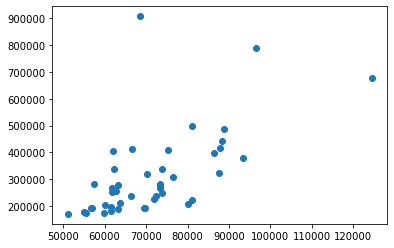

In [39]:
plt.scatter(df_pandas["avg(post_tax_income)"], df_pandas["avg(avg_median_listing_price)"])

In [40]:
real.show()

+------+-------+--------------------+--------------------+----------------+------------+---------------------+-------------------+
|  date|zipcode|median_listing_price|active_listing_count|median_per_sq_ft|median_sq_ft|average_listing_price|total_listing_count|
+------+-------+--------------------+--------------------+----------------+------------+---------------------+-------------------+
|201801|  10001|             4950000|                  79|     2054.737468|        2053|          6114301.803|              187	1|
|201801|  10002|             1922500|                 114|     1917.428043|      1027.5|          2344101.514|             1250	1|
|201801|  10003|             2072500|                 170|     1384.542096|         670|          3716218.722|              590	1|
|201801|  10004|             1185000|                  22|     1285.714286|       852.5|          2322130.435|               42	1|
|201801|  10005|           1395000.5|                  79|     1385.177251|        

In [41]:
income.show()

+-------+-----+--------+------------+------------+---------------+-----------+----------+-----------+--------------+
|zipcode|state|agi_stub|          n1|total_income|state_and_local|real_estate|  num_paid|paid_amount|taxable_amount|
+-------+-----+--------+------------+------------+---------------+-----------+----------+-----------+--------------+
|  00000|   AK|       1| 102970.0000|1217577.0000|        91.0000|  2345.0000|  760.0000|  2871.0000| 258661.0000	1|
|  00000|   AK|       2|  78020.0000|2883175.0000|        99.0000|  7750.0000| 2140.0000|  8440.0000|1606418.0000	1|
|  00000|   AK|       3|  51120.0000|3184731.0000|       488.0000| 14187.0000| 3470.0000| 15114.0000|2212441.0000	1|
|  00000|   AK|       4|  35550.0000|3112057.0000|       474.0000| 15475.0000| 3520.0000| 16971.0000|2334158.0000	1|
|  00000|   AK|       5|  59750.0000|8274715.0000|      3487.0000| 46867.0000| 8750.0000| 51648.0000|6713257.0000	1|
|  00000|   AK|       6|  17810.0000|6953958.0000|      6337.000